# 1.2 - Background and Anomalies calculated by Boxplot

___


1.0) Geological Setting and Mineral Disponibility

1.1) Data Assessing and Data Cleaning

**1.2) Exploratory Data Analysis & Geostats**

2.1) Spatial Analysis

2.2) Hydrograph Basins Delimitations

2.3) Correlation between basins and samples

3.0) Conclusion

___

## Table Of Content


- [Importing Libraries](#libs)

- [Importing files](#files)

- [Exploratory Data Analysis](#eda)

- [1.2.1 Univariate Analysis](#uni)

- [1.2.2 Bivariate Analysis](#bi)

<a name = "libs" ><a/>
## Importing Libraries

In [2]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 47.7 MB/s eta 0:00:00


In [3]:
!pip install pysheds

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pysheds: filename=pysheds-0.4-py3-none-any.whl size=90687 sha256=36bfdc47dfde362d1e289e8ee82f566411e892f3b3ed0777cd8d88b69a39fd2c
  Stored in directory: /root/.cache/pip/wheels/8f/2b/0d/988f11a32332312c4d5dfe1720f891789e5b01853f6a842be6
Successfully built pysheds


In [24]:
!pip install NanStats

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
import scipy as sp
import warnings

#spatial libs
import geopandas as gpd
import rasterio as rio
import pysheds
from pysheds.grid import Grid

warnings.filterwarnings("ignore")

%matplotlib inline

In [5]:
from google.colab import files


<a name = "files" ><a/>
## Importing Files

In [6]:
df = pd.read_csv('/content/NURE_15_data_cleaned.csv', sep = ',')
df.head()

,rec_no,X,Y,orgn_pct,u_dn_ppm,u_fl_ppm,ag_ppm,al_pct,as_ppm,b_ppm,...,p_ppm,sc_ppm,se_ppm,sr_ppm,th_ppm,ti_ppm,v_ppm,y_ppm,zn_ppm,zr_ppm
0,5239129,-102.759,29.703,2.0,2.25,1.44,2.0,2.16,2.4,5.0,...,296.0,3.0,0.3,315.0,6.0,2082.0,38.0,10.0,333.0,56.0
1,5239061,-102.834,29.465,5.0,3.05,2.32,2.0,3.02,5.0,28.0,...,449.0,5.0,0.4,543.0,7.0,2707.0,87.0,12.0,59.0,64.0
2,5239062,-102.816,29.473,1.0,3.18,2.03,2.0,4.27,6.2,23.0,...,447.0,7.0,0.3,419.0,8.0,3518.0,80.0,17.0,64.0,92.0
3,5239065,-102.863,29.432,1.0,2.84,1.78,2.0,3.69,4.5,26.0,...,537.0,5.0,0.4,445.0,8.0,2323.0,79.0,14.0,54.0,76.0
4,5239066,-102.930,29.871,1.0,2.14,1.46,2.0,1.67,2.2,5.0,...,203.0,2.0,0.2,339.0,3.0,1645.0,34.0,6.0,19.0,27.0


In [8]:
df = df.replace(['', 'NA', 'NULL'], pd.NA)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 35 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rec_no    517 non-null    int64  
 1   X         517 non-null    float64
 2   Y         517 non-null    float64
 3   orgn_pct  397 non-null    float64
 4   u_dn_ppm  507 non-null    float64
 5   u_fl_ppm  513 non-null    float64
 6   ag_ppm    511 non-null    float64
 7   al_pct    511 non-null    float64
 8   as_ppm    513 non-null    float64
 9   b_ppm     511 non-null    float64
 10  ba_ppm    511 non-null    float64
 11  be_ppm    511 non-null    float64
 12  ca_pct    511 non-null    float64
 13  co_ppm    511 non-null    float64
 14  cr_ppm    511 non-null    float64
 15  cu_ppm    511 non-null    float64
 16  fe_pct    511 non-null    float64
 17  k_pct     511 non-null    float64
 18  li_ppm    511 non-null    float64
 19  mg_pct    511 non-null    float64
 20  mn_ppm    511 non-null    float6

<a name = "eda" ><a/>
## Exploratory Data Analysis

In [10]:
df.describe()

,rec_no,X,Y,orgn_pct,u_dn_ppm,u_fl_ppm,ag_ppm,al_pct,as_ppm,b_ppm,...,p_ppm,sc_ppm,se_ppm,sr_ppm,th_ppm,ti_ppm,v_ppm,y_ppm,zn_ppm,zr_ppm
count,5.170000e+02,517.000000,517.000000,397.000000,507.000000,513.000000,511.000000,511.00000,513.000000,511.000000,...,511.000000,511.000000,513.000000,511.000000,511.000000,511.00000,511.000000,511.000000,511.000000,511.000000
mean,5.239713e+06,-103.022141,29.684134,2.453401,2.521085,1.948109,1.228963,3.41636,3.101462,33.418787,...,691.117417,5.425636,0.374659,398.651663,6.506849,4384.37182,67.653620,14.056751,105.272016,87.234834
std,4.636407e+02,0.300681,0.182198,2.903493,0.637763,0.609973,0.505288,1.08336,1.264387,129.015232,...,548.404211,2.513366,0.309408,178.973500,2.951811,4631.56204,44.421945,6.025250,99.306055,51.298584
min,5.239061e+06,-103.653000,29.274000,1.000000,1.400000,0.600000,1.000000,0.70000,0.050000,5.000000,...,158.000000,0.500000,0.050000,94.000000,1.000000,204.00000,9.000000,0.500000,9.000000,14.000000
25%,5.239359e+06,-103.210000,29.570000,1.000000,2.100000,1.560000,1.000000,2.66000,2.200000,5.000000,...,389.000000,4.000000,0.200000,282.000000,5.000000,1987.00000,40.000000,11.000000,54.500000,59.000000
50%,5.239751e+06,-102.977000,29.673000,1.000000,2.400000,1.880000,1.000000,3.18000,2.900000,5.000000,...,524.000000,5.000000,0.300000,353.000000,6.000000,2680.00000,54.000000,12.000000,69.000000,71.000000
75%,5.239998e+06,-102.863000,29.788000,3.000000,2.785000,2.200000,1.000000,4.22000,3.900000,14.000000,...,748.000000,7.000000,0.500000,472.000000,8.000000,4467.00000,79.000000,16.000000,100.500000,97.000000
max,5.241244e+06,-102.231000,30.174000,25.000000,6.210000,7.540000,6.000000,6.59000,9.200000,876.000000,...,4363.000000,18.000000,1.800000,1605.000000,25.000000,38032.00000,362.000000,60.000000,731.000000,350.000000


### Transforming everything to log-scale

To make better analysis, let's transform everything to log-scale and then take a look at statistics.

In [11]:
#creating a df copy
copy = df.copy()

#removing coordinates
#copy.drop(columns=['rec_no','X','Y'],inplace = True)

copy.head(2)

,rec_no,X,Y,orgn_pct,u_dn_ppm,u_fl_ppm,ag_ppm,al_pct,as_ppm,b_ppm,...,p_ppm,sc_ppm,se_ppm,sr_ppm,th_ppm,ti_ppm,v_ppm,y_ppm,zn_ppm,zr_ppm
0,5239129,-102.759,29.703,2.0,2.25,1.44,2.0,2.16,2.4,5.0,...,296.0,3.0,0.3,315.0,6.0,2082.0,38.0,10.0,333.0,56.0
1,5239061,-102.834,29.465,5.0,3.05,2.32,2.0,3.02,5.0,28.0,...,449.0,5.0,0.4,543.0,7.0,2707.0,87.0,12.0,59.0,64.0


In [15]:
df_log = copy.copy()

# Get a list of columns to apply log transformation to
log_transform_cols = [col for col in df_log.columns if col not in ['rec_no', 'X', 'Y']]

# Apply log transformation only to the selected columns
for col in log_transform_cols:
    try:
        df_log[col] = np.absolute(np.log10(df_log[col]))
    except:
        pass

# Merge the log-transformed columns with the original 'rec_no', 'X', and 'Y' columns
df_log = pd.concat([df[['rec_no', 'X', 'Y']], df_log[log_transform_cols]], axis=1)

df_log.head(2)

,rec_no,X,Y,orgn_pct,u_dn_ppm,u_fl_ppm,ag_ppm,al_pct,as_ppm,b_ppm,...,p_ppm,sc_ppm,se_ppm,sr_ppm,th_ppm,ti_ppm,v_ppm,y_ppm,zn_ppm,zr_ppm
0,5239129,-102.759,29.703,0.30103,0.352183,0.158362,0.30103,0.334454,0.380211,0.698970,...,2.471292,0.477121,0.522879,2.498311,0.778151,3.318481,1.579784,1.000000,2.522444,1.748188
1,5239061,-102.834,29.465,0.69897,0.484300,0.365488,0.30103,0.480007,0.698970,1.447158,...,2.652246,0.698970,0.397940,2.734800,0.845098,3.432488,1.939519,1.079181,1.770852,1.806180


<a name="uni"></a>
## 1.2.1 Univariate Analysis

### Anomalies and Background

- John Tukey (1977) sets the following terms:
    
> 1st Order Anomalies: Q3 + 3AIQ

> 2nd Order Anomalies: Q3 + 1.5AIQ

> Background: Q2

- Another way of calculating is using MAD

> Anomalies: Median + 2MAD

In [ ]:
#had to use np.nan to ignore nan values in the calculation

In [26]:
#getting statistics

elements = [col for col in df_log.columns if col not in ['rec_no', 'X', 'Y']]

stats_list = []

for e in elements:
    minimun = np.nanmin(df_log[e])
    q1 = np.nanpercentile(df_log[e], 25)  # Q1
    mean = np.nanmean(df_log[e])
    median = np.nanmedian(df_log[e])
    q2 = np.nanpercentile(df_log[e],50) #Q2
    maximun = np.nanmax(df_log[e])
    q3 = np.nanpercentile(df_log[e],75) #Q3
    std = np.nanstd(df_log[e])
    var = std**2
    cv = ((std/mean)*100)
    skew = sp.stats.skew(df_log[e].dropna())
    kurtosis = sp.stats.kurtosis(df_log[e].dropna())
    aiq = q3-q1
    anomaly_1 = q3 + 3*aiq
    anomaly_2 = q3 + 1.5*aiq
    values = [e, minimun,q1, mean, median,q2, maximun,q3, std, var, cv, skew, kurtosis,aiq, anomaly_1, anomaly_2]
    stats_list.append(values)

#creating a statistic dataframe
df_stats = pd.DataFrame(stats_list)
df_stats.columns = ['element','min', 'q1', 'mean','median','background','max','q3','std','var','coefvar','skewness','kurtosis','aiq', '1anomaly','2anomaly']
df_stats

,element,min,q1,mean,median,background,max,q3,std,var,coefvar,skewness,kurtosis,aiq,1anomaly,2anomaly
0,orgn_pct,0.000000,0.000000,0.248344,0.000000,0.000000,1.397940,0.477121,0.308418,0.095122,124.189975,1.155312,0.801337,0.477121,1.908485,1.192803
1,u_dn_ppm,0.146128,0.322219,0.389796,0.380211,0.380211,0.793092,0.444824,0.097958,0.009596,25.130689,0.839696,1.003927,0.122605,0.812640,0.628732
2,u_fl_ppm,0.008600,0.195900,0.275389,0.274158,0.274158,0.877371,0.342423,0.116658,0.013609,42.360989,0.489732,1.348396,0.146523,0.781992,0.562207
3,ag_ppm,0.000000,0.000000,0.065535,0.000000,0.000000,0.778151,0.000000,0.131764,0.017362,201.057850,1.785243,2.509852,0.000000,0.000000,0.000000
4,al_pct,0.041393,0.424879,0.511911,0.502427,0.502427,0.818885,0.625312,0.139209,0.019379,27.193946,-0.176832,-0.263100,0.200434,1.226614,0.925963
5,as_ppm,0.000000,0.342423,0.464161,0.462398,0.462398,1.301030,0.591065,0.172114,0.029623,37.080637,0.136013,0.682579,0.248642,1.336990,0.964027
6,b_ppm,0.698970,0.698970,0.945766,0.698970,0.698970,2.942504,1.146128,0.463848,0.215155,49.044654,2.493792,6.719695,0.447158,2.487602,1.816865
7,ba_ppm,2.064458,2.452552,2.570688,2.553883,2.553883,3.529559,2.670245,0.200847,0.040340,7.812967,0.742938,1.833805,0.217692,3.323322,2.996784
8,be_ppm,0.000000,0.000000,0.163119,0.000000,0.000000,1.778151,0.301030,0.228974,0.052429,140.372608,1.775843,5.386849,0.301030,1.204120,0.752575
9,ca_pct,0.033424,0.913548,1.063123,1.179264,1.179264,1.560982,1.291591,0.318117,0.101198,29.922865,-1.177653,0.510217,0.378043,2.425719,1.858655


### Boxplots and Histograms

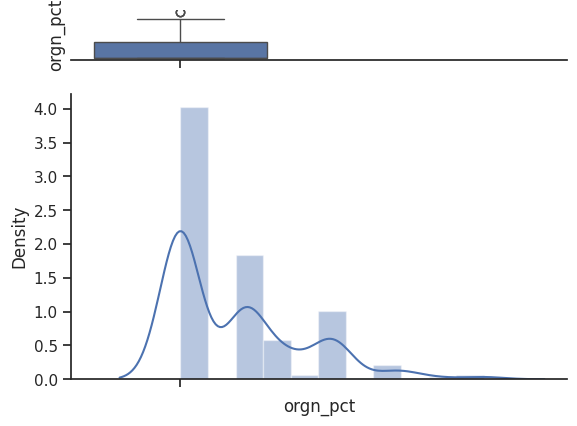

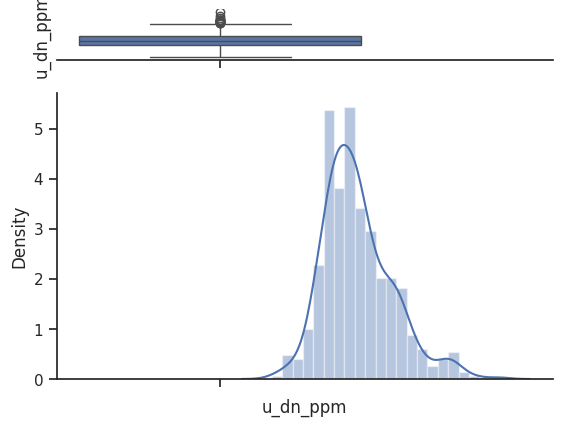

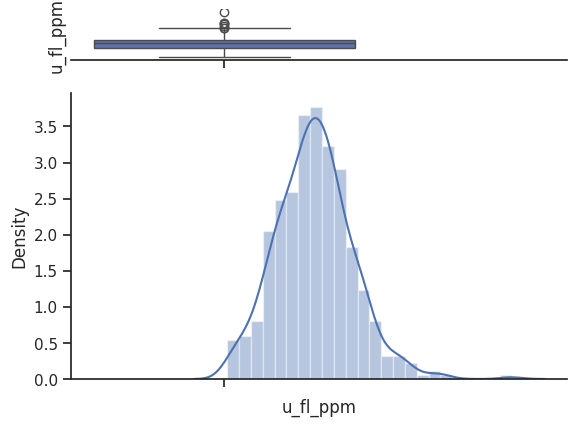

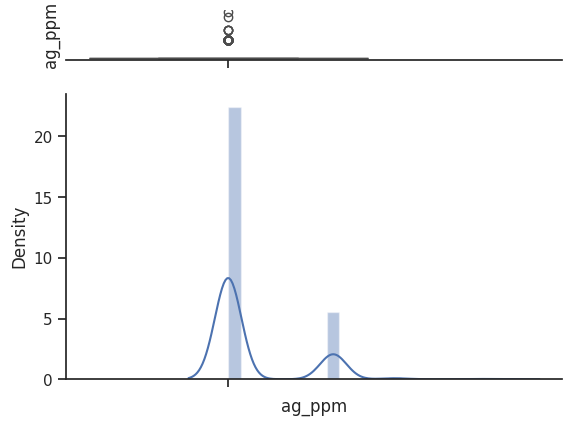

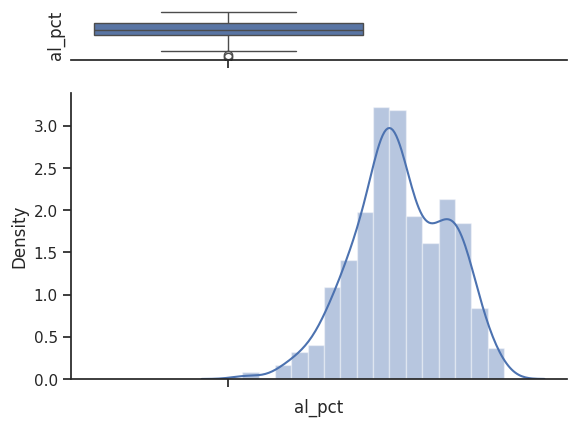

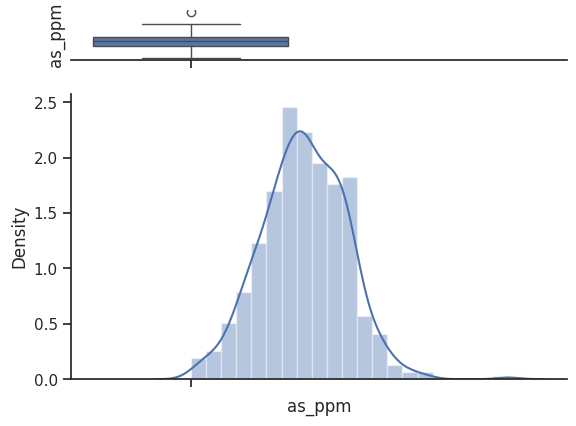

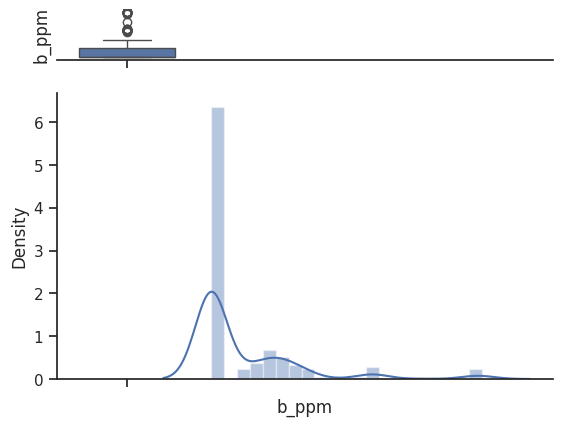

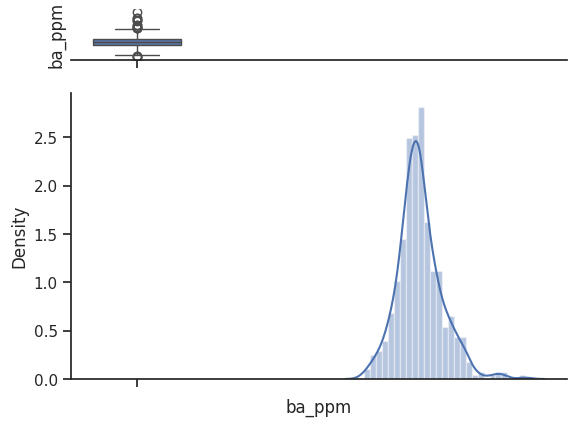

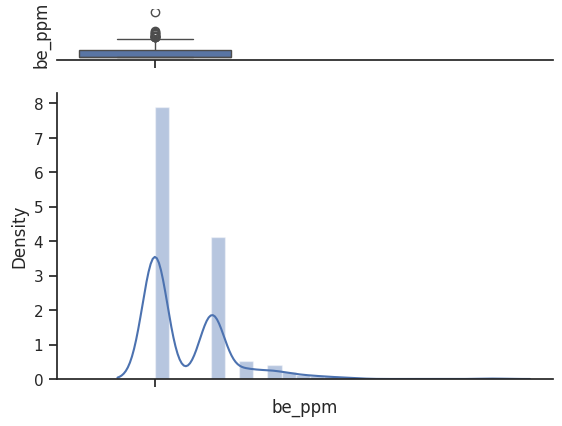

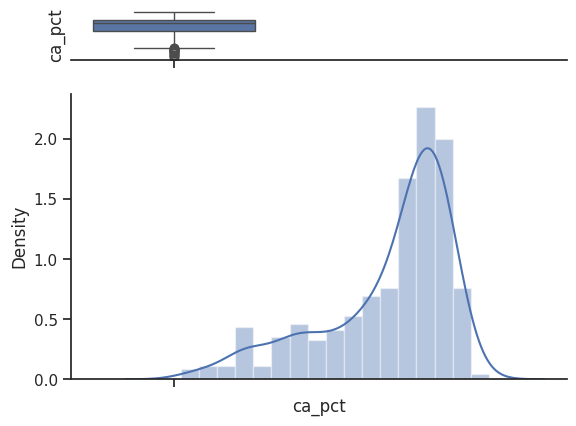

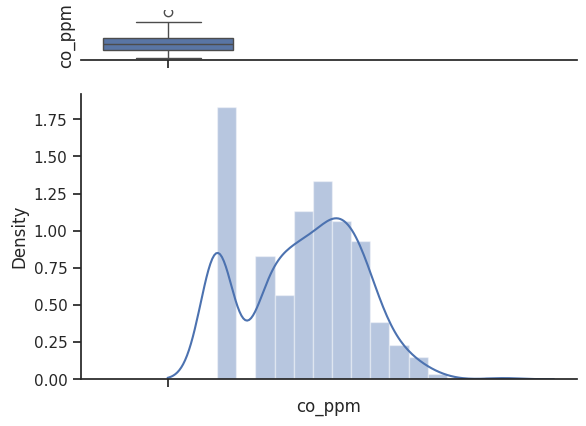

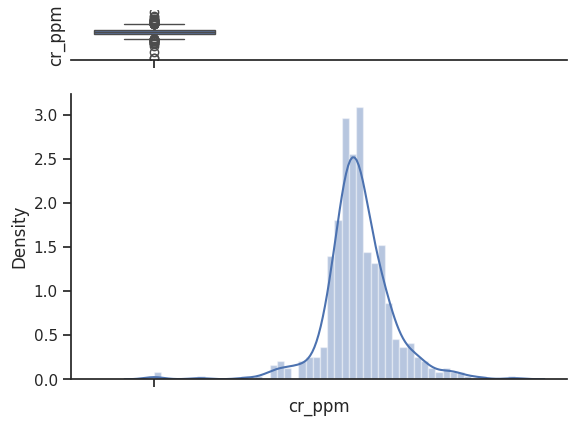

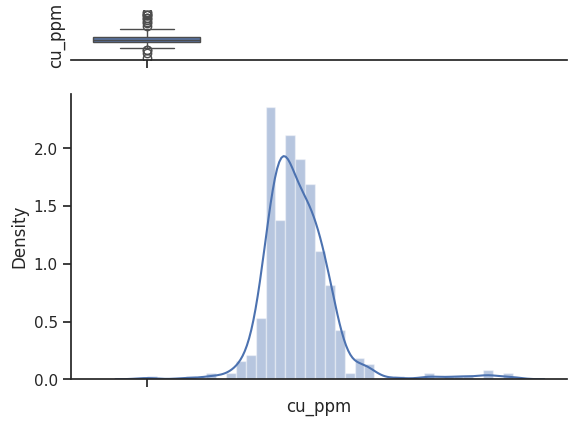

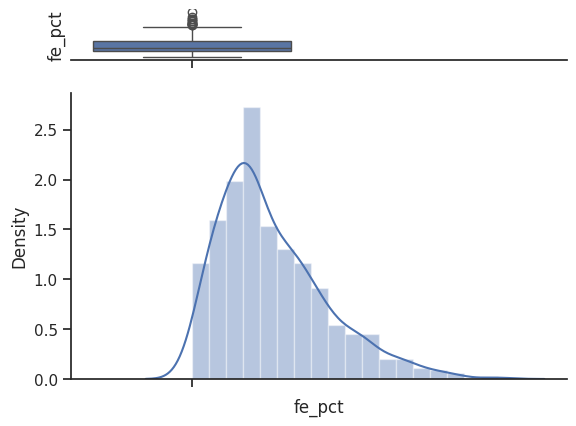

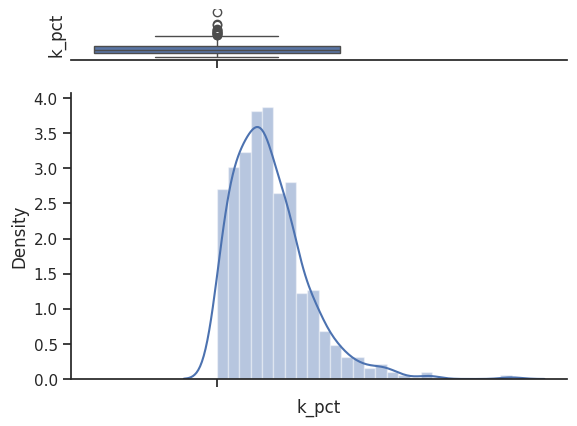

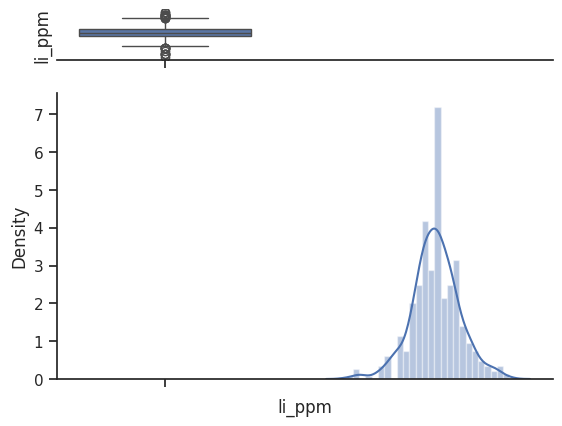

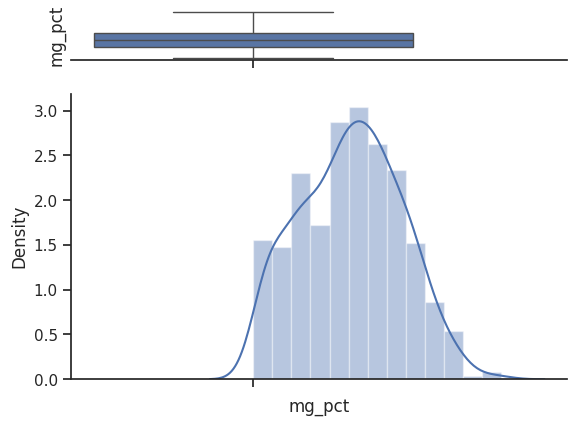

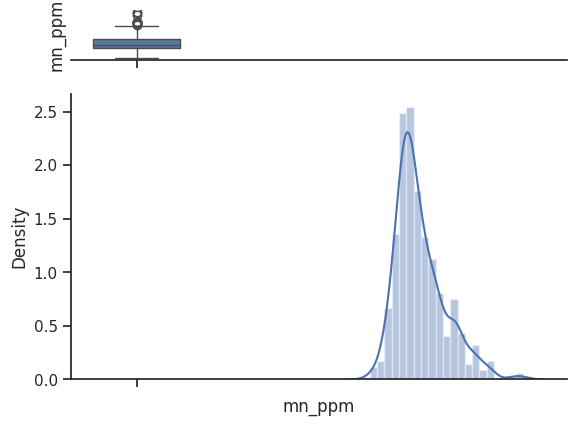

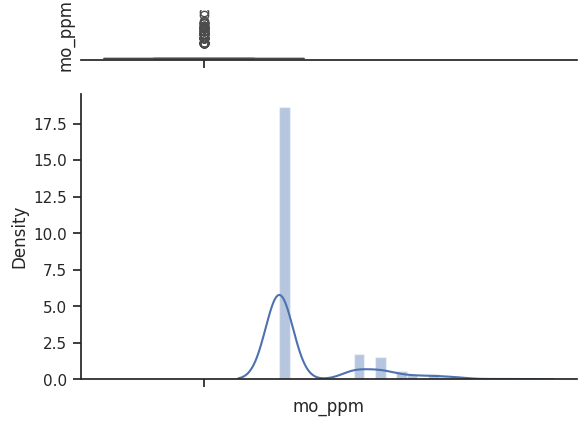

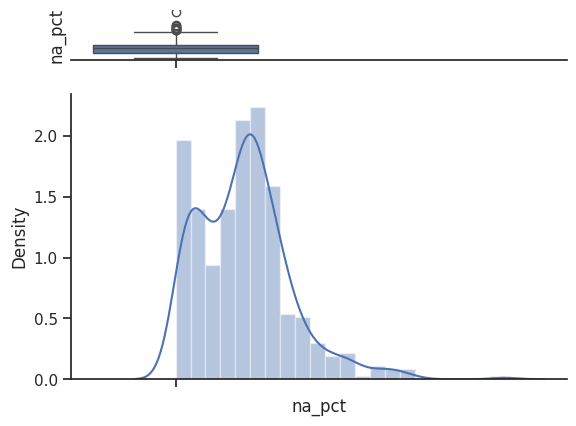

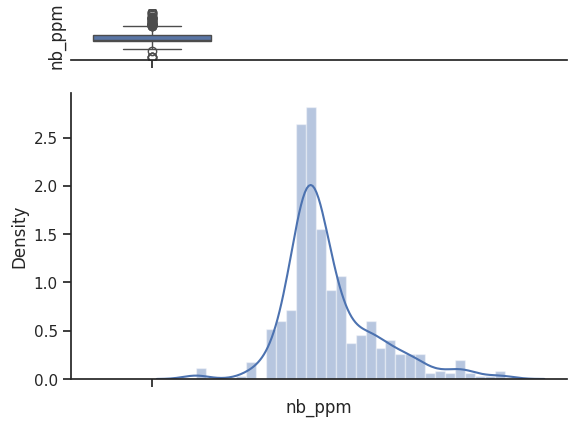

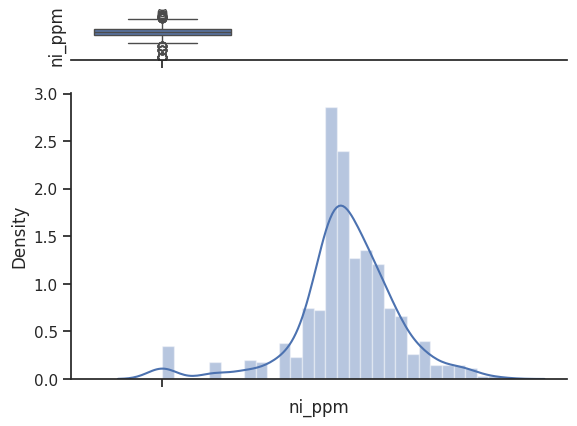

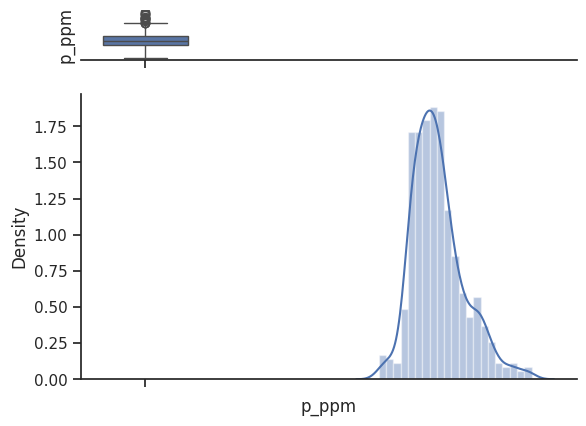

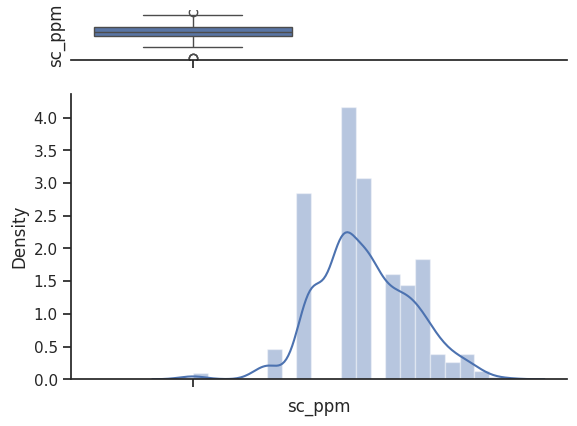

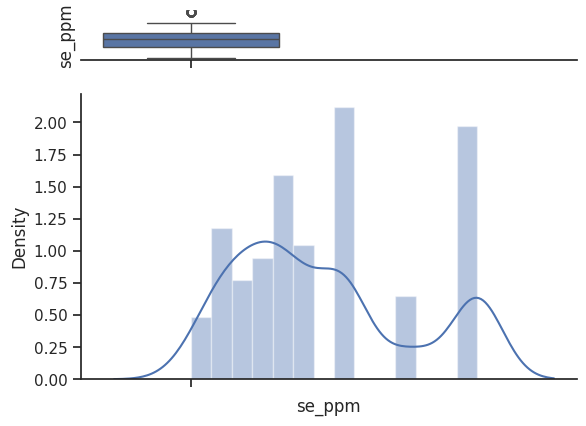

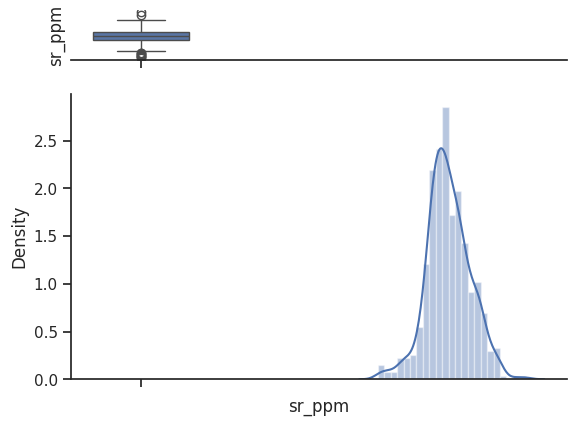

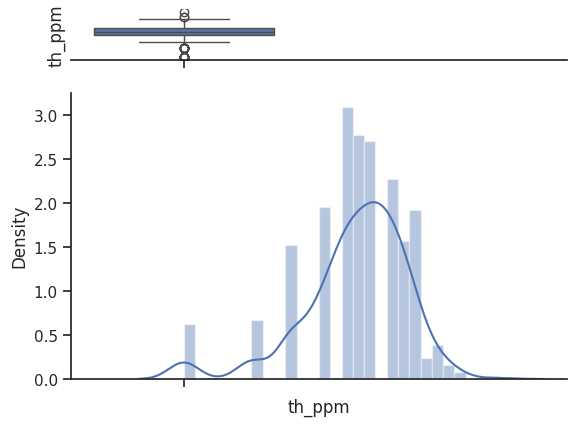

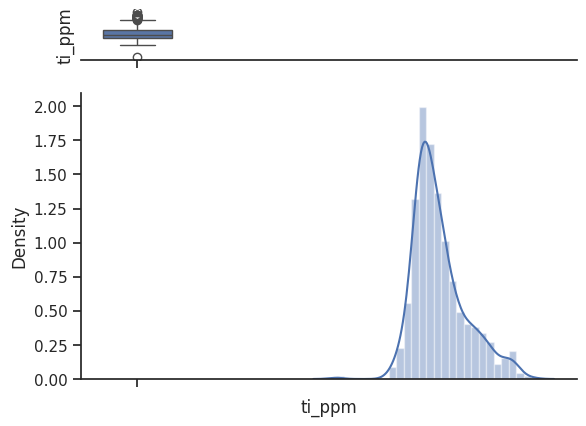

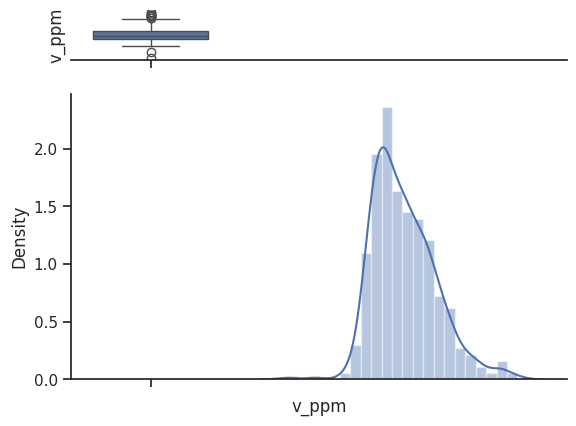

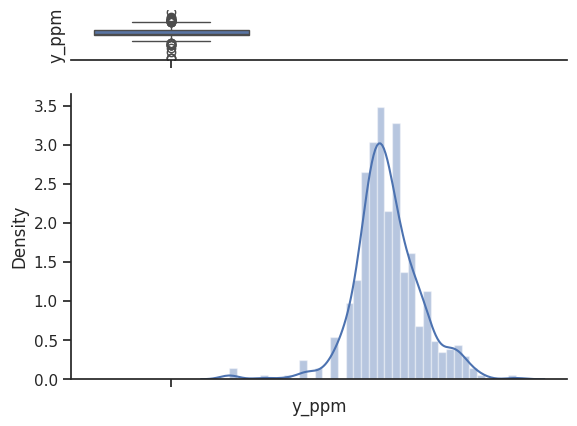

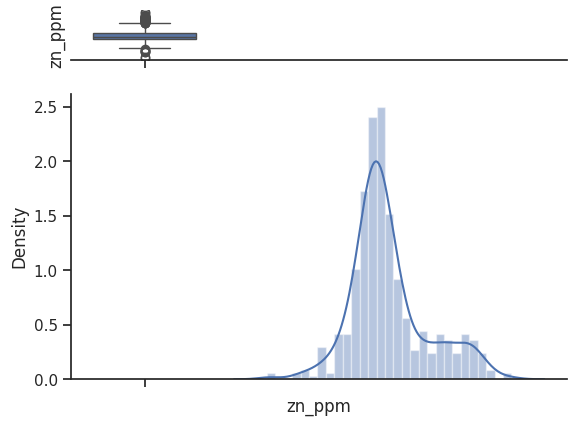

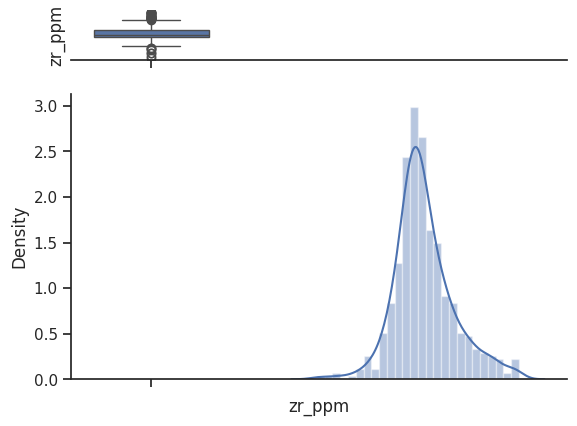

In [27]:
sb.set(style="ticks")

for col in elements:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
                                    gridspec_kw={"height_ratios": (.15, .85)})

    sb.boxplot(df_log[col], ax=ax_box)
    sb.distplot(df_log[col], ax=ax_hist)

    ax_box.set(yticks=[])
    sb.despine(ax=ax_hist)
    sb.despine(ax=ax_box, left=True)

In [28]:
dft = df_stats.set_index('element').transpose(copy = True)
dft.to_csv('/content/element_anomalies.csv', index = True, sep = ',')
files.download('element_anomalies.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Looking for Stations with Anomalies

In [32]:
dft.head()

element,orgn_pct,u_dn_ppm,u_fl_ppm,ag_ppm,al_pct,as_ppm,b_ppm,ba_ppm,be_ppm,ca_pct,...,p_ppm,sc_ppm,se_ppm,sr_ppm,th_ppm,ti_ppm,v_ppm,y_ppm,zn_ppm,zr_ppm
min,0.000000,0.146128,0.008600,0.000000,0.041393,0.000000,0.698970,2.064458,0.000000,0.033424,...,2.198657,0.000000,0.000000,1.973128,0.000000,2.309630,0.954243,0.301030,0.954243,1.146128
q1,0.000000,0.322219,0.195900,0.000000,0.424879,0.342423,0.698970,2.452552,0.000000,0.913548,...,2.589948,0.602060,0.301030,2.450249,0.698970,3.298198,1.602060,1.041393,1.736378,1.770852
mean,0.248344,0.389796,0.275389,0.065535,0.511911,0.464161,0.945766,2.570688,0.163119,1.063123,...,2.757957,0.693169,0.604918,2.562629,0.761416,3.509030,1.768308,1.114626,1.902577,1.887360
median,0.000000,0.380211,0.274158,0.000000,0.502427,0.462398,0.698970,2.553883,0.000000,1.179264,...,2.719331,0.698970,0.522879,2.547775,0.778151,3.428135,1.732394,1.079181,1.838849,1.851258
background,0.000000,0.380211,0.274158,0.000000,0.502427,0.462398,0.698970,2.553883,0.000000,1.179264,...,2.719331,0.698970,0.522879,2.547775,0.778151,3.428135,1.732394,1.079181,1.838849,1.851258


In [29]:
#1st order anomaly
anomaly = list(dft.iloc[-2])
#2nd order anomaly
second_anomaly = list(dft.iloc[-1])

In [30]:
df_log.head()

,rec_no,X,Y,orgn_pct,u_dn_ppm,u_fl_ppm,ag_ppm,al_pct,as_ppm,b_ppm,...,p_ppm,sc_ppm,se_ppm,sr_ppm,th_ppm,ti_ppm,v_ppm,y_ppm,zn_ppm,zr_ppm
0,5239129,-102.759,29.703,0.30103,0.352183,0.158362,0.30103,0.334454,0.380211,0.698970,...,2.471292,0.477121,0.522879,2.498311,0.778151,3.318481,1.579784,1.000000,2.522444,1.748188
1,5239061,-102.834,29.465,0.69897,0.484300,0.365488,0.30103,0.480007,0.698970,1.447158,...,2.652246,0.698970,0.397940,2.734800,0.845098,3.432488,1.939519,1.079181,1.770852,1.806180
2,5239062,-102.816,29.473,0.00000,0.502427,0.307496,0.30103,0.630428,0.792392,1.361728,...,2.650308,0.845098,0.522879,2.622214,0.903090,3.546296,1.903090,1.230449,1.806180,1.963788
3,5239065,-102.863,29.432,0.00000,0.453318,0.250420,0.30103,0.567026,0.653213,1.414973,...,2.729974,0.698970,0.397940,2.648360,0.903090,3.366049,1.897627,1.146128,1.732394,1.880814
4,5239066,-102.930,29.871,0.00000,0.330414,0.164353,0.30103,0.222716,0.342423,0.698970,...,2.307496,0.301030,0.698970,2.530200,0.477121,3.216166,1.531479,0.778151,1.278754,1.431364


In [38]:
anom_stations = []

#for the length of elements list
for i in range(len(elements)):
    i += 1                          #add 1 to the index
                                    #(because the anomaly index starts at 0, and df_log index 0 is the station name)
    anom= anomaly[i-1]             #subtract 1 from index and then return the proper value in the list
    sec_anom = second_anomaly[i-1]
    values = df_log.iloc[:,i]       #getting only the specific element column
    name = values.name
    #print(name)                     #printing the element column
    list_values = list(values)      #transforming the column in a list of values. Each record is a sample

    for v in list_values:
        if v >= anom:
            #if the anomaly is higher or equal the value print the 1st order anomaly

            #picking up the index of the value
            idx = list_values.index(v)
            #now, getting the station name based on the index
            station = df_log['rec_no']
            x = df['X'][idx]
            y = df['Y'][idx]
            anom_type = '1'
            anom_list = [station, x, y, name, v, anom, anom_type]
            anom_stations.append(anom_list)
        elif sec_anom <= v < anom:
            #if the anomaly is higher or equal the 2nd order anomaly or lower than 1st order

            #picking up the index of the value
            idx = list_values.index(v)
            #now, getting the station name based on the index
            station = df_log['rec_no']
            x = df['X'][idx]
            y = df['Y'][idx]
            anom_type = '2'
            anom_list = [station, x, y, name, v, sec_anom, anom_type]
            anom_stations.append(anom_list)
        else:
            pass
#creating dataframe and dropping duplicates
df_anom = pd.DataFrame(anom_stations, columns = ['station','x','y','element','value','anomaly', 'anom_type'])
df_anom.drop_duplicates(inplace = True)
df_anom.to_csv('/content/elements_anomaly_filtered.csv', index = False)
files.download('element_anomalies_filtered.csv')
df_anom

TypeError: unhashable type: 'Series'

In [ ]:
anom_stations = []

#for the length of elements list
for i in range(len(elements)):
    i += 1                          #add 1 to the index
                                    #(because the anomaly index starts at 0, and df_log index 0 is the station name)
    anom= anomaly[i-1]             #subtract 1 from index and then return the proper value in the list
    sec_anom = second_anomaly[i-1]
    values = df_log.iloc[:,i]       #getting only the specific element column
    name = values.name
    #print(name)                     #printing the element column
    list_values = list(values)      #transforming the column in a list of values. Each record is a sample

    for v in list_values:
        if v >= anom:
            #if the anomaly is higher or equal the value print the 1st order anomaly

            #picking up the index of the value
            idx = list_values.index(v)
            #now, getting the station name based on the index
            station = df_log['rec_no']
            x = df['X'][idx]
            y = df['Y'][idx]
            anom_type = '1'
            anom_list = [station, x, y, name, v, anom, anom_type]
            anom_stations.append(anom_list)
        elif sec_anom <= v < anom:
            #if the anomaly is higher or equal the 2nd order anomaly or lower than 1st order

            #picking up the index of the value
            idx = list_values.index(v)
            #now, getting the station name based on the index
            station = df_log['rec_no']
            x = df['X'][idx]
            y = df['Y'][idx]
            anom_type = '2'
            anom_list = [station, x, y, name, v, sec_anom, anom_type]
            anom_stations.append(anom_list)
        else:
            pass
#creating dataframe and dropping duplicates
df_anom = pd.DataFrame(anom_stations, columns = ['station','x','y','element','value','anomaly', 'anom_type'])
df_anom.drop_duplicates(inplace = True)
df_anom.to_csv('/content/elements_anomaly_filtered.csv', index = False)
files.download('element_anomalies_filtered.csv')
df_anom

NameError: name 'j' is not defined

In [ ]:
anom_stations = []

#for the length of elements list
for i in range(len(elements)):
    i += 1                          #add 1 to the index
                                    #(because the anomaly index starts at 0, and df_log index 0 is the station name)
    anom= anomaly[i-1]             #subtract 1 from index and then return the proper value in the list
    sec_anom = second_anomaly[i-1]
    values = df_log.iloc[:,i]       #getting only the specific element column
    name = values.name
    #print(name)                     #printing the element column
    list_values = list(values)      #transforming the column in a list of values. Each record is a sample

    for v in list_values:
        if v >= anom:
            #if the anomaly is higher or equal the value print the 1st order anomaly

            #picking up the index of the value
            idx = list_values.index(v)
            #now, getting the station name based on the index
            station = df_log['rec_no']
            x = df['X'][idx]
            y = df['Y'][idx]
            anom_type = '1'
            anom_list = [station, x, y, name, v, anom, anom_type]
            anom_stations.append(anom_list)
        elif sec_anom <= v < anom:
            #if the anomaly is higher or equal the 2nd order anomaly or lower than 1st order

            #picking up the index of the value
            idx = list_values.index(v)
            #now, getting the station name based on the index
            station = df_log['rec_no']
            x = df['X'][idx]
            y = df['Y'][idx]
            anom_type = '2'
            anom_list = [station, x, y, name, v, sec_anom, anom_type]
            anom_stations.append(anom_list)
        else:
            pass
#creating dataframe and dropping duplicates
df_anom = pd.DataFrame(anom_stations, columns = ['station','x','y','element','value','anomaly', 'anom_type'])
df_anom.drop_duplicates(inplace = True)
df_anom.to_csv('/content/elements_anomaly_filtered.csv', index = False)
files.download('element_anomalies_filtered.csv')
df_anom

NameError: name 'j' is not defined

In [ ]:
anom_stations = []

#for the length of elements list
for i in range(len(elements)):
    i += 1                          #add 1 to the index
                                    #(because the anomaly index starts at 0, and df_log index 0 is the station name)
    anom= anomaly[i-1]             #subtract 1 from index and then return the proper value in the list
    sec_anom = second_anomaly[i-1]
    values = df_log.iloc[:,i]       #getting only the specific element column
    name = values.name
    #print(name)                     #printing the element column
    list_values = list(values)      #transforming the column in a list of values. Each record is a sample

    for v in list_values:
        if v >= anom:
            #if the anomaly is higher or equal the value print the 1st order anomaly

            #picking up the index of the value
            idx = list_values.index(v)
            #now, getting the station name based on the index
            station = df_log['rec_no']
            x = df['X'][idx]
            y = df['Y'][idx]
            anom_type = '1'
            anom_list = [station, x, y, name, v, anom, anom_type]
            anom_stations.append(anom_list)
        elif sec_anom <= v < anom:
            #if the anomaly is higher or equal the 2nd order anomaly or lower than 1st order

            #picking up the index of the value
            idx = list_values.index(v)
            #now, getting the station name based on the index
            station = df_log['rec_no']
            x = df['X'][idx]
            y = df['Y'][idx]
            anom_type = '2'
            anom_list = [station, x, y, name, v, sec_anom, anom_type]
            anom_stations.append(anom_list)
        else:
            pass
#creating dataframe and dropping duplicates
df_anom = pd.DataFrame(anom_stations, columns = ['station','x','y','element','value','anomaly', 'anom_type'])
df_anom.drop_duplicates(inplace = True)
df_anom.to_csv('/content/elements_anomaly_filtered.csv', index = False)
files.download('element_anomalies_filtered.csv')
df_anom

NameError: name 'j' is not defined

In [44]:
anom_stations = []

#for the length of elements list
for i in range(len(elements)):
    i += 1                          #add 1 to the index
                                    #(because the anomaly index starts at 0, and df_log index 0 is the station name)
    anom= anomaly[i-1]             #subtract 1 from index and then return the proper value in the list
    sec_anom = second_anomaly[i-1]
    values = df_log.iloc[:,i]       #getting only the specific element column
    name = values.name
    #print(name)                     #printing the element column

    # Iterate through values and corresponding rec_no (station names)
    for station, v in zip(df_log['rec_no'], values):
        if v >= anom:
            # Get x and y coordinates based on station name in df
            x = df.loc[df['rec_no'] == station, 'X'].values[0]
            y = df.loc[df['rec_no'] == station, 'Y'].values[0]

            anom_type = '1'
            anom_list = [station, x, y, name, v, anom, anom_type]
            anom_stations.append(anom_list)
        elif sec_anom <= v < anom:
            # Get x and y coordinates based on station name in df
            x = df.loc[df['rec_no'] == station, 'X'].values[0]
            y = df.loc[df['rec_no'] == station, 'Y'].values[0]

            anom_type = '2'
            anom_list = [station, x, y, name, v, sec_anom, anom_type]
            anom_stations.append(anom_list)
        else:
            pass


#creating dataframe and dropping duplicates
df_anom = pd.DataFrame(anom_stations, columns = ['station','x','y','element','value','anomaly', 'anom_type'])
df_anom.drop_duplicates(inplace = True)
df_anom.to_csv('/content/elements_anomaly_filtered.csv', index = False)
files.download('elements_anomaly_filtered.csv')
df_anom

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,station,x,y,element,value,anomaly,anom_type
0,5239129,-102.759,29.703,Y,29.703000,0.812640,1
1,5239061,-102.834,29.465,Y,29.465000,0.812640,1
2,5239062,-102.816,29.473,Y,29.473000,0.812640,1
3,5239065,-102.863,29.432,Y,29.432000,0.812640,1
4,5239066,-102.930,29.871,Y,29.871000,0.812640,1
...,...,...,...,...,...,...,...
4727,5239332,-103.082,29.475,v_ppm,2.453318,2.400834,2
4728,5239333,-103.070,29.455,v_ppm,2.448706,2.400834,2
4729,5239918,-103.063,29.648,v_ppm,2.450249,2.400834,2
4730,5239936,-102.868,29.494,v_ppm,2.424882,2.400834,2


## Conclusions on Univariate Analysis

- One

- Two

___

<a name="bi"></a>
# 1.2.2 Bivariate Analysis

## Spearman Correlation

In [45]:
#elements that have some kind of anomaly
anom_elements = list(df_anom['element'].unique())

In [46]:
print(anom_elements)

['Y', 'orgn_pct', 'u_dn_ppm', 'b_ppm', 'ba_ppm', 'co_ppm', 'cr_ppm', 'cu_ppm', 'k_pct', 'mg_pct', 'mn_ppm', 'ni_ppm', 'p_ppm', 'se_ppm', 'ti_ppm', 'v_ppm']


<Axes: >

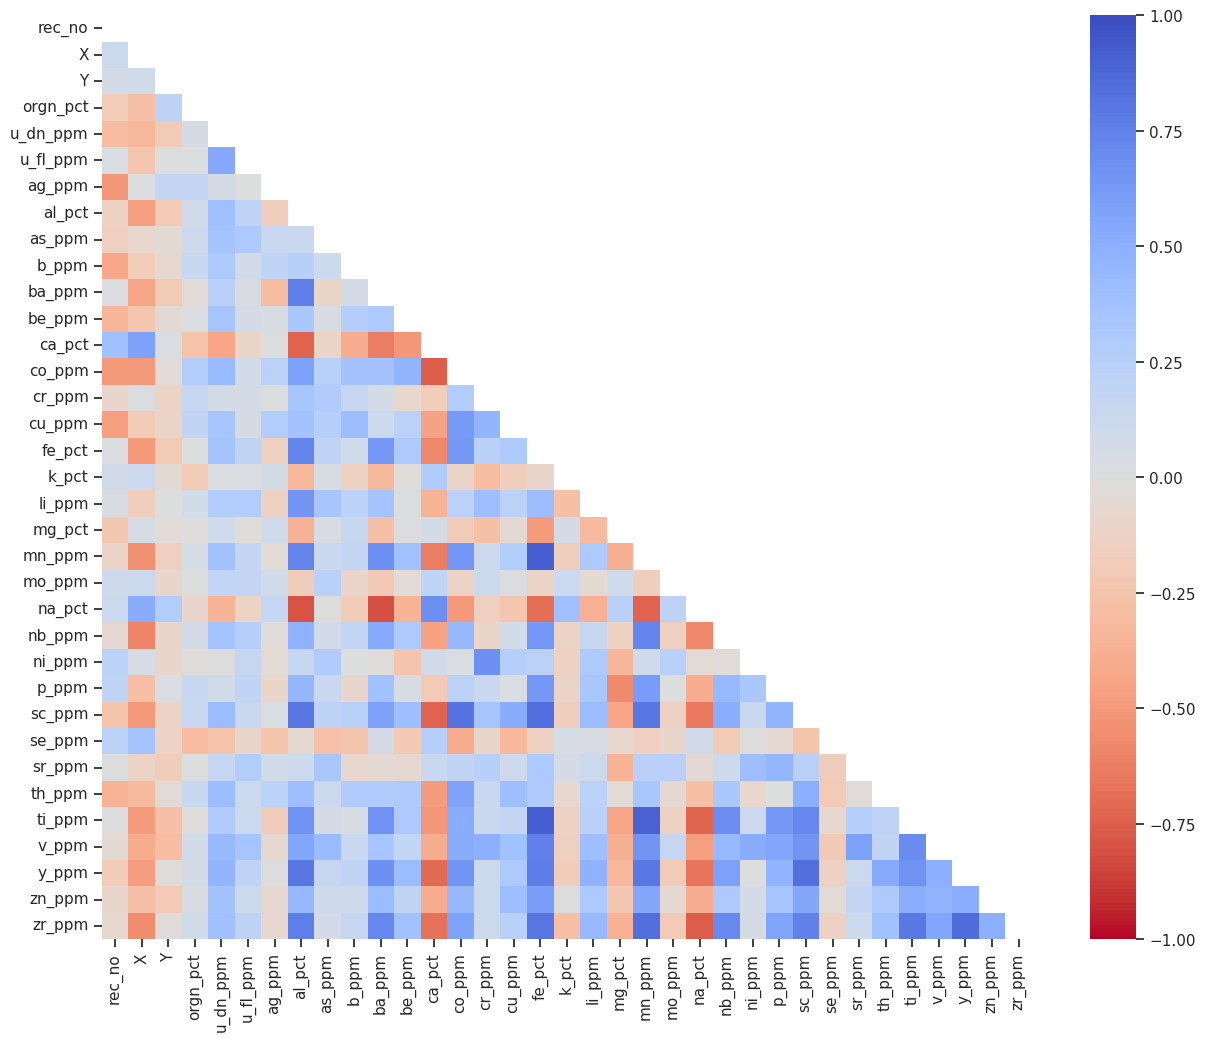

In [48]:
#making the correlation betweens elements
corr = df_log.corr(method="spearman")

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
plt.figure(figsize=(15,12))
# using the upper triangle matrix as mask
sb.heatmap(corr,
           annot=False,
           mask=matrix,
           fmt = '.2f',
           cmap = 'coolwarm_r',
          vmax = 1,
          vmin = -1)

## Selecting Values where Pvalue > 0.8

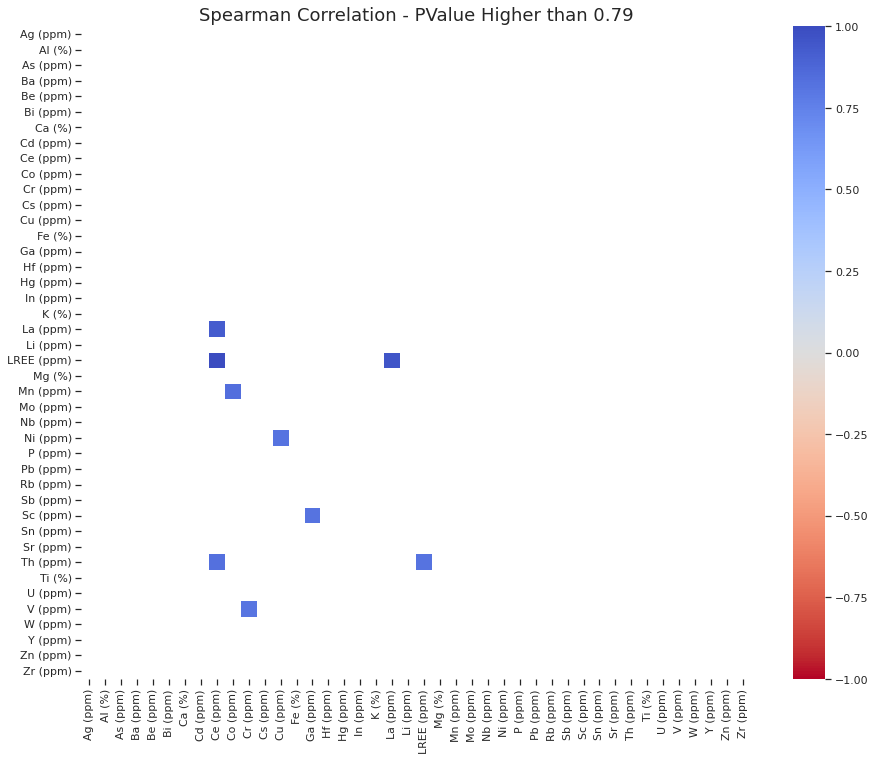

In [ ]:
#selecting values where pvalue >0.8
kot = corr[corr>=0.8]

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(kot)
plt.figure(figsize=(15,12))
# using the upper triangle matrix as mask
sb.heatmap(kot,
           annot=False,
           mask=matrix,
           fmt = '.2f',
           cmap = 'coolwarm_r',
          vmax = 1,
          vmin = -1)
plt.title('Spearman Correlation - PValue Higher than 0.79', fontsize = 18);

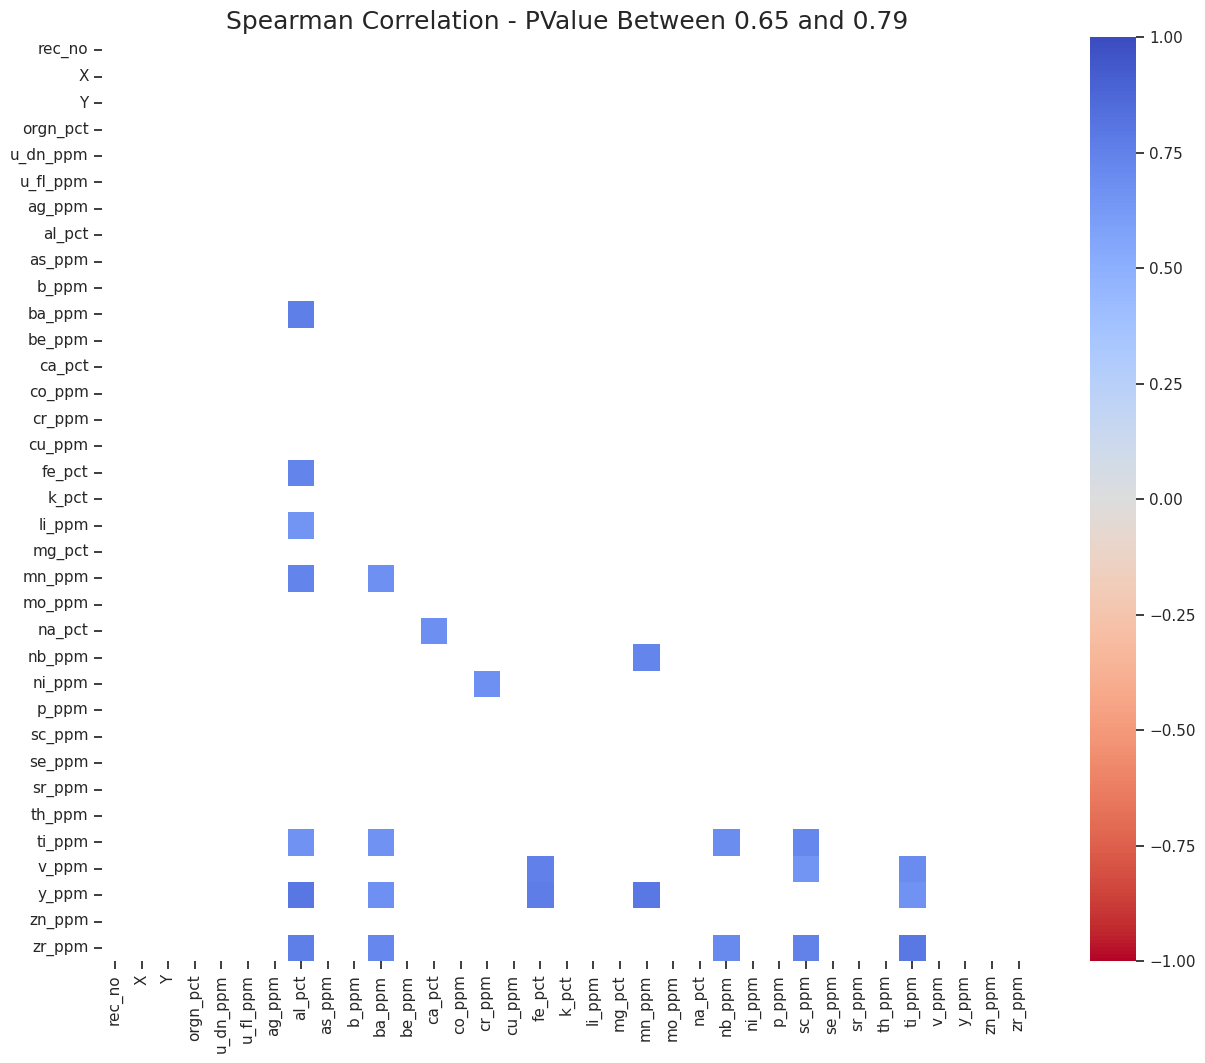

In [49]:
#selecting values where pvalue >0.65
kot = corr[(corr>=0.65) & (corr < 0.8)]

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(kot)
plt.figure(figsize=(15,12))
# using the upper triangle matrix as mask
sb.heatmap(kot,
           annot=False,
           mask=matrix,
           fmt = '.2f',
           cmap = 'coolwarm_r',
          vmax = 1,
          vmin = -1)
plt.title('Spearman Correlation - PValue Between 0.65 and 0.79', fontsize = 18);

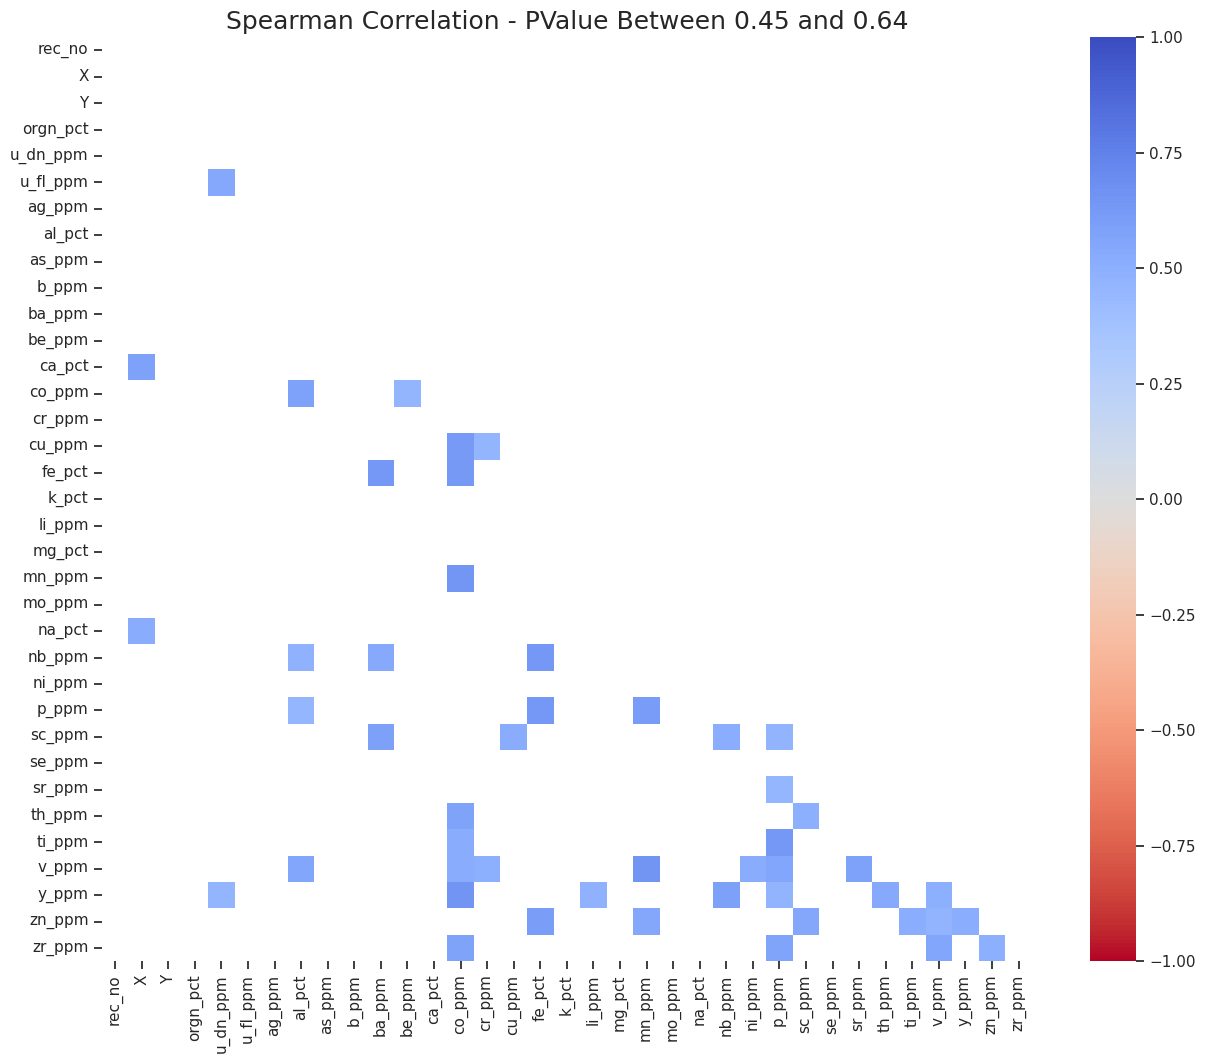

In [50]:
#selecting values where pvalue >0.45
kot = corr[(corr>=0.45) & (corr < 0.65)]

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(kot)
plt.figure(figsize=(15,12))
# using the upper triangle matrix as mask
sb.heatmap(kot,
           annot=False,
           mask=matrix,
           fmt = '.2f',
           cmap = 'coolwarm_r',
          vmax = 1,
          vmin = -1)
plt.title('Spearman Correlation - PValue Between 0.45 and 0.64', fontsize = 18);

In [51]:
correlations = corr.abs().unstack()
high_corr = correlations[(correlations>=0.8) & (correlations<1)]
high_corr = high_corr.sort_values(ascending = False).reset_index()
high_corr.columns =['element1','element2','pvalue']
high_corr.drop_duplicates(subset='pvalue', keep="last", inplace = True)
#creating lists with the high corr elements
hc_element1 = list(high_corr['element1'])
hc_element2 = list(high_corr['element2'])

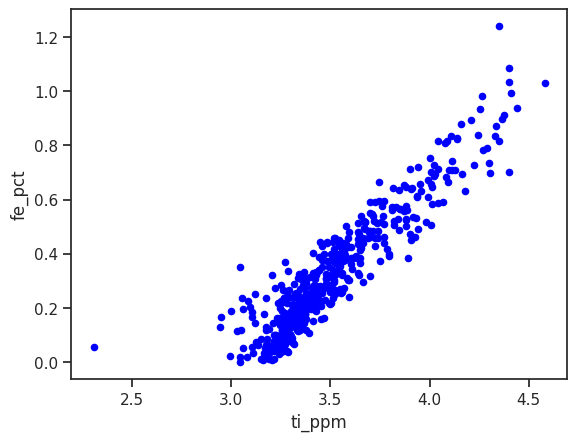

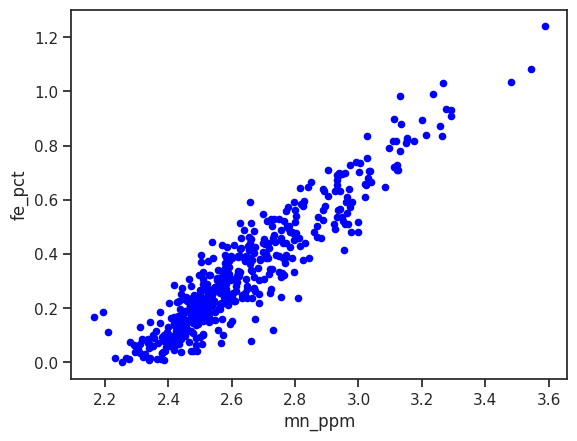

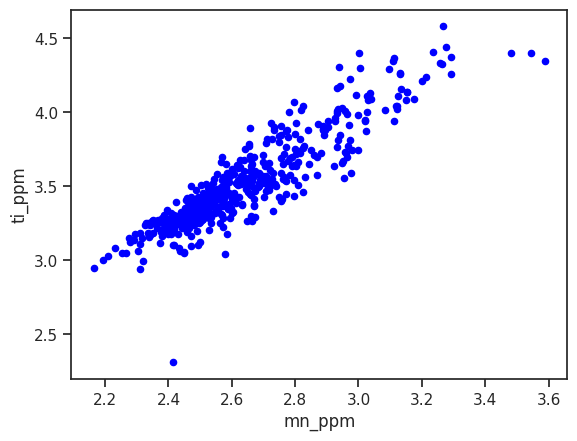

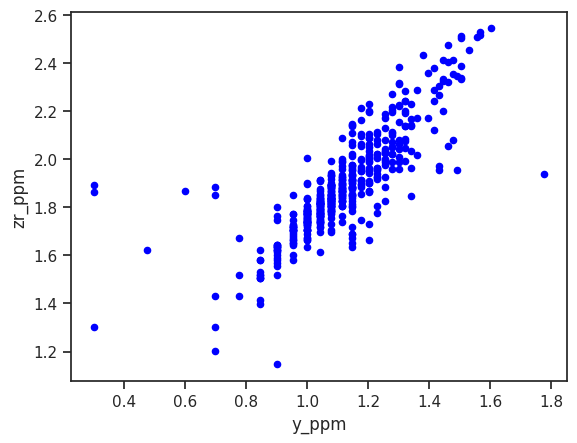

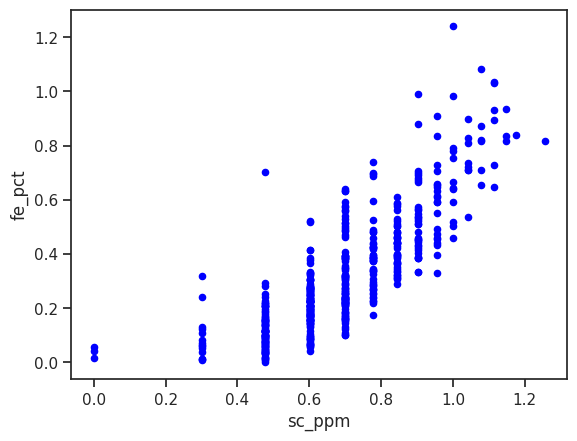

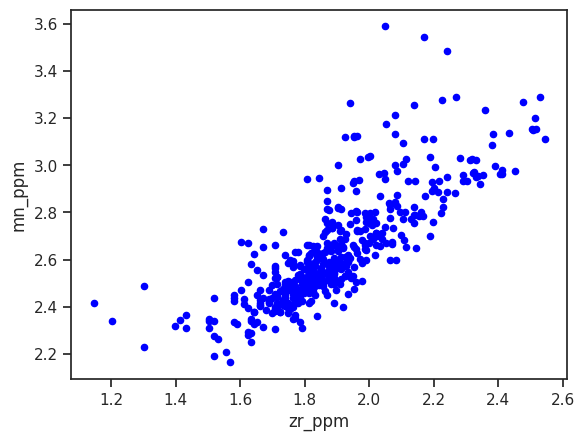

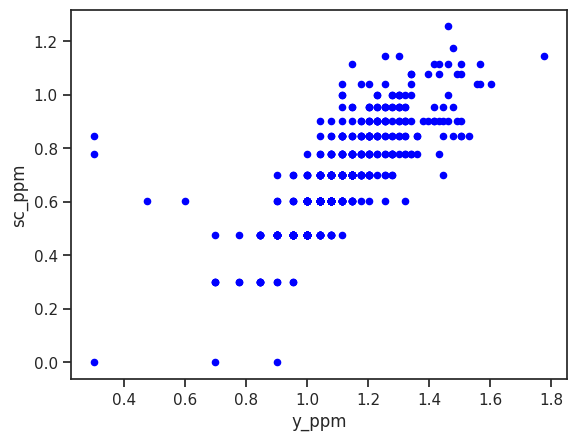

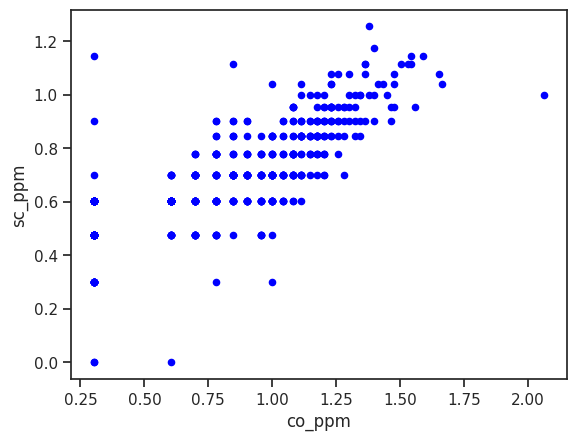

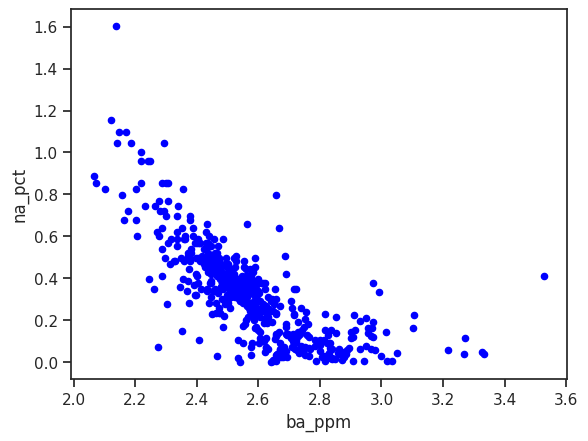

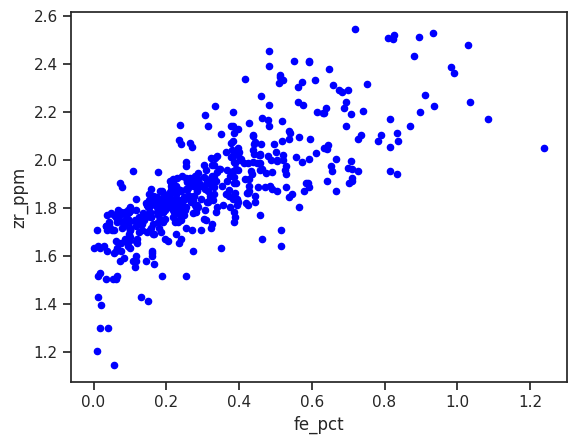

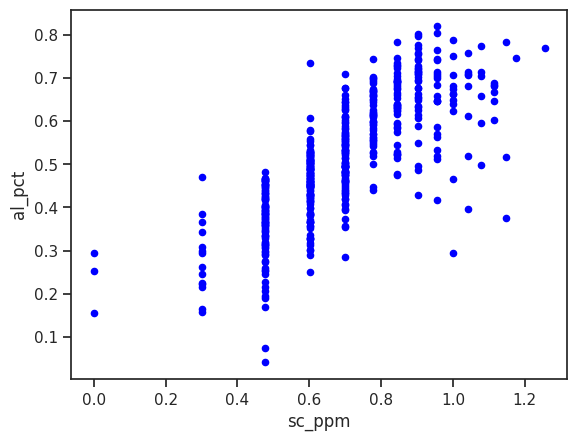

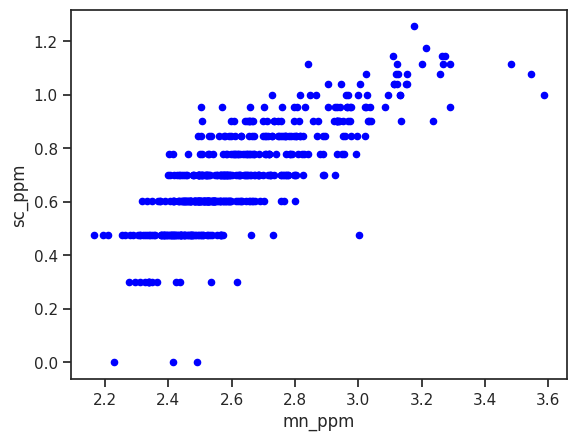

In [52]:
ele = []
for e1, e2 in zip(hc_element1, hc_element2):
    eles = [e1,e2]
    ele.append(eles)
    df_scatter = df_log.filter(items = eles)
    df_scatter.plot(kind = 'scatter', x = e1, y = e2, color = 'blue')


In [53]:
medium_corr = correlations[(correlations>=0.65) & (correlations<0.8)]
medium_corr = medium_corr.sort_values(ascending = False).reset_index()
medium_corr.columns =['element1','element2','pvalue']
medium_corr.drop_duplicates(subset='pvalue', keep="last", inplace = True)
medium_corr


,element1,element2,pvalue
1,al_pct,y_ppm,0.798838
3,ti_ppm,zr_ppm,0.795441
5,mn_ppm,y_ppm,0.795319
7,na_pct,al_pct,0.792662
9,y_ppm,fe_pct,0.769905
11,ba_ppm,al_pct,0.763711
13,zr_ppm,na_pct,0.762592
15,zr_ppm,al_pct,0.762578
17,ca_pct,co_ppm,0.753324
19,v_ppm,fe_pct,0.752184


In [54]:
low_corr = correlations[(correlations>=0.45) & (correlations<0.65)]
low_corr = low_corr.sort_values(ascending = False).reset_index()
low_corr.columns =['element1','element2','pvalue']
low_corr.drop_duplicates(subset='pvalue', keep="last", inplace = True)
low_corr


,element1,element2,pvalue
1,co_ppm,y_ppm,0.649411
3,mn_ppm,v_ppm,0.648687
5,co_ppm,mn_ppm,0.644665
7,na_pct,sc_ppm,0.641290
9,ti_ppm,p_ppm,0.640246
...,...,...,...
141,y_ppm,u_dn_ppm,0.462165
143,p_ppm,sr_ppm,0.460076
145,p_ppm,al_pct,0.454565
147,ca_pct,nb_ppm,0.453915


## Conclusion on Bivariate Analysis

- One

- Two



In [ ]:
# reading saved CSV file
df_anom = pd.read_csv('OUTPUTS/CSV/elements_anomaly_filtered.csv')

#transforming anomaly dataframe to geodataframe
gdf = gpd.GeoDataFrame(
    df_anom,
    geometry = gpd.points_from_xy(df_anom.x, df_anom.y)
)

#saving data with spatial information
gdf.to_csv('OUTPUTS/CSV/elements_anomaly_filtered_spatialData.csv', index = False)


#loading geologic shapefiles
lito = gpd.read_file('./shapefiles/Unidades_litoestratigráficas___1_100_000.shp')


In [ ]:
gdf.head()

,station,x,y,element,value,anomaly,anom_type,geometry
0,EC-0122,281044,7961773,Al (%),0.884795,0.823883,2,POINT (281044.000 7961773.000)
1,BM0014,238782,7911968,Al (%),0.867467,0.823883,2,POINT (238782.000 7911968.000)
2,BM0028,236767,7925246,Al (%),0.894316,0.823883,2,POINT (236767.000 7925246.000)
3,BM-0174,332011,7908847,Al (%),0.972203,0.823883,2,POINT (332011.000 7908847.000)
4,EC-0124,321352,7910059,Al (%),0.940018,0.823883,2,POINT (321352.000 7910059.000)


In [ ]:
#setting the CRS of the points
gdf.set_crs('epsg:31983', inplace = True)

,station,x,y,element,value,anomaly,anom_type,geometry
0,EC-0122,281044,7961773,Al (%),0.884795,0.823883,2,POINT (281044.000 7961773.000)
1,BM0014,238782,7911968,Al (%),0.867467,0.823883,2,POINT (238782.000 7911968.000)
2,BM0028,236767,7925246,Al (%),0.894316,0.823883,2,POINT (236767.000 7925246.000)
3,BM-0174,332011,7908847,Al (%),0.972203,0.823883,2,POINT (332011.000 7908847.000)
4,EC-0124,321352,7910059,Al (%),0.940018,0.823883,2,POINT (321352.000 7910059.000)
...,...,...,...,...,...,...,...,...
545,SM-0083,339758,7955762,Zr (ppm),1.905796,1.799041,2,POINT (339758.000 7955762.000)
546,SM-0091,324828,7957056,Zr (ppm),1.801404,1.799041,2,POINT (324828.000 7957056.000)
548,LG-0028,317479,7901094,Zr (ppm),1.893207,1.799041,2,POINT (317479.000 7901094.000)
549,MR-0211,305520,7915678,Zr (ppm),1.848805,1.799041,2,POINT (305520.000 7915678.000)


In [ ]:
#checking CRS information
gdf.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - 48°W to 42°W
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
#transforming CRS from 31983 to 4326
gdf.to_crs(4326, inplace = True)

In [ ]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
#filtering only 1st order anomaly from anomalies table
anomOne = gdf.loc[gdf['anom_type'] == "1"]
print(f'In total, there are {len(anomOne)} samples classified as Anomaly Type 1.')

In total, there are 42 samples classified as Anomaly Type 1.


In [ ]:
#filtering only 2nd order anomaly from anomalies table
anomTwo = gdf.loc[gdf['anom_type'] == "2"]
print(f'In total, there are {len(anomTwo)} samples classified as Anomaly Type 2.')

In total, there are 430 samples classified as Anomaly Type 2.


In [ ]:
lito.head()

,ID_UNIDADE,SIGLA,HIERARQUIA,NOME,AMBIENTE_T,SUB_AMBIEN,SIGLA_PAI,NOME_PAI,LEGENDA,ESCALA,...,ERA_MIN,ERA_MAX,SISTEMA_MI,SISTEMA_MA,EPOCA_MIN,EPOCA_MAX,SIGLAS_HIS,SHAPE_AREA,SHAPE_LEN,geometry
0,5678,NP1amx,Unidade,"Unidade Araxá, micaxisto",None,None,NParx,NParx - Grupo Araxá,(Granada)-mica xistos com níveis de quartzitos...,1:100.000,...,Neoproterozóico,Neoproterozóico,Toniano,Toniano,Wenloquiano,Wenloquiano,None,0.000012,0.018612,"POLYGON ((-47.49203 -19.00000, -47.49204 -19.0..."
1,1498,Q1di,Unidade,Unidade Depósitos detríticos indiferenciados,None,None,None,None,"Cobertura detrítica inconsolidada, formada por...",1:100.000,...,Cenozóico,Cenozóico,Neogeno,Neogeno,Superior,Superior,N3di,0.000042,0.032530,"POLYGON ((-47.28336 -19.00000, -47.29740 -19.0..."
2,1498,Q1di,Unidade,Unidade Depósitos detríticos indiferenciados,None,None,None,None,"Cobertura detrítica inconsolidada, formada por...",1:100.000,...,Cenozóico,Cenozóico,Neogeno,Neogeno,Superior,Superior,N3di,0.038793,5.265542,"POLYGON ((-47.45074 -18.76916, -47.45152 -18.7..."
3,5678,NP1amx,Unidade,"Unidade Araxá, micaxisto",None,None,NParx,NParx - Grupo Araxá,(Granada)-mica xistos com níveis de quartzitos...,1:100.000,...,Neoproterozóico,Neoproterozóico,Toniano,Toniano,Wenloquiano,Wenloquiano,None,0.002387,1.356382,"POLYGON ((-47.11283 -18.89145, -47.11291 -18.8..."
4,955,NP3irv,Formação,Formação Rio Verde,None,None,NPi,NPi - Grupo Ibiá,"Filito, calcixisto, clorita xisto, sericita xi...",1:100.000,...,Neoproterozóico,Neoproterozóico,Ediacarano,Ediacarano,Pridoliano,Pridoliano,NPrv,0.034263,7.809570,"POLYGON ((-47.25837 -18.50000, -47.25836 -18.5..."


In [ ]:
oneJoin = gpd.sjoin(anomOne, lito, how = "left", op="within")
oneJoin.head()

,station,x,y,element,value,anomaly,anom_type,geometry,index_right,ID_UNIDADE,...,EON_MAX,ERA_MIN,ERA_MAX,SISTEMA_MI,SISTEMA_MA,EPOCA_MIN,EPOCA_MAX,SIGLAS_HIS,SHAPE_AREA,SHAPE_LEN
36,SQ-0020A,339604,7952821,Ba (ppm),3.155032,3.049356,1,POINT (-46.51941 -18.50903),1116,723,...,Proterozóico,Neoproterozóico,Neoproterozóico,Ediacarano,Ediacarano,Pridoliano,Pridoliano,NP2ss,0.000773,0.336361
37,SQ-0021,337232,7952778,Ba (ppm),3.243038,3.049356,1,POINT (-46.54188 -18.50923),1116,723,...,Proterozóico,Neoproterozóico,Neoproterozóico,Ediacarano,Ediacarano,Pridoliano,Pridoliano,NP2ss,0.000773,0.336361
38,SQ-0024,335287,7949753,Ba (ppm),3.073352,3.049356,1,POINT (-46.56054 -18.53641),966,723,...,Proterozóico,Neoproterozóico,Neoproterozóico,Ediacarano,Ediacarano,Pridoliano,Pridoliano,NP2ss,0.054810,18.927352
41,EC-0122,281044,7961773,Be (ppm),1.000000,0.966576,1,POINT (-47.07294 -18.42290),1041,1498,...,Fanerozóico,Cenozóico,Cenozóico,Neogeno,Neogeno,Superior,Superior,N3di,0.009870,1.085807
55,MR0046,253953,7945025,Be (ppm),1.012837,0.966576,1,POINT (-47.33132 -18.57118),731,5678,...,Proterozóico,Neoproterozóico,Neoproterozóico,Toniano,Toniano,Wenloquiano,Wenloquiano,None,0.007145,0.866590


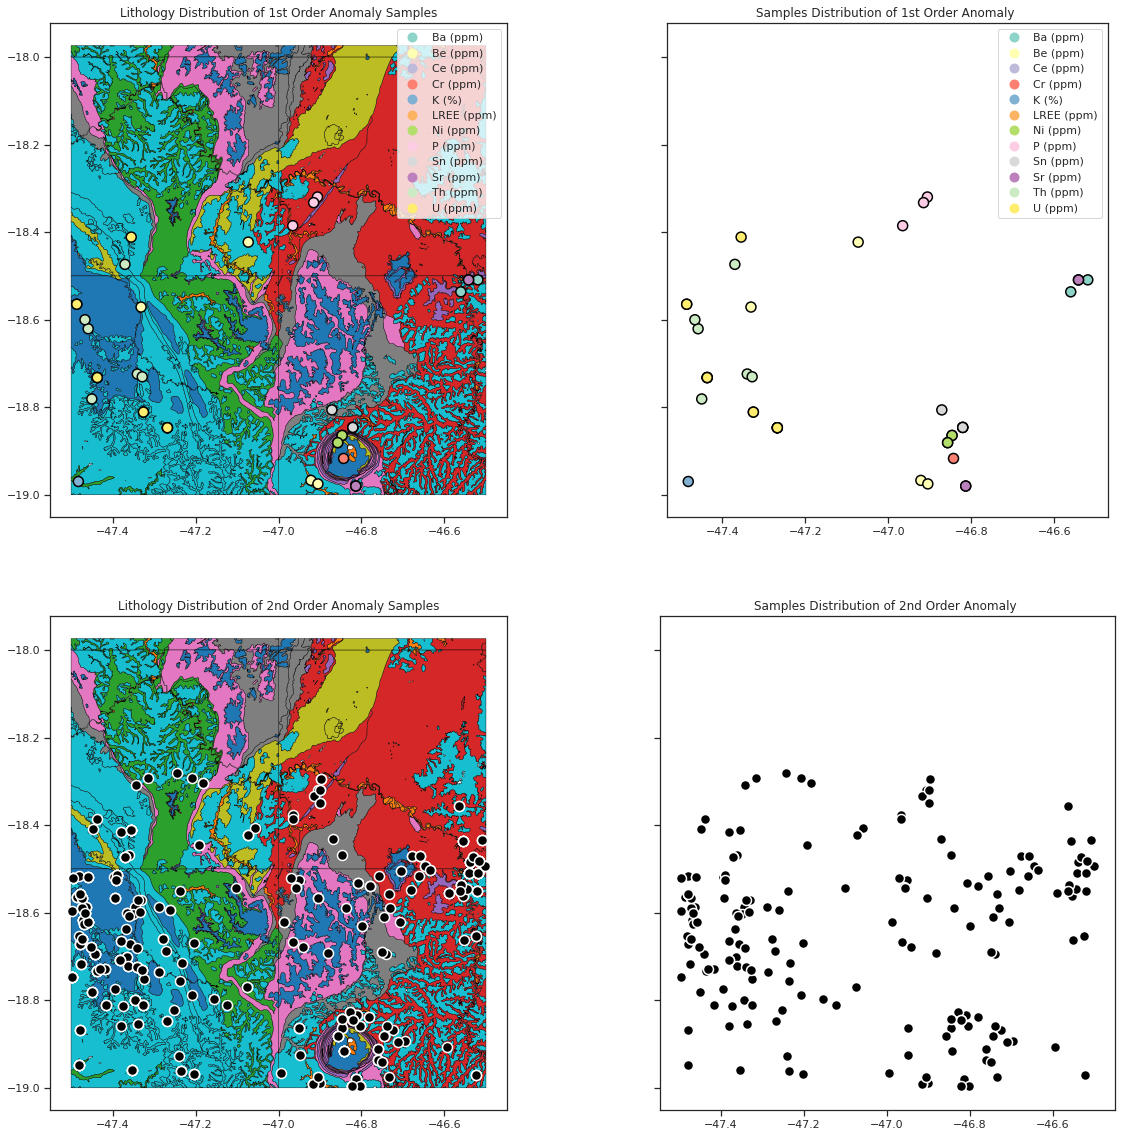

In [ ]:
fig, axes = plt.subplots(nrows = 2,
                         ncols=2,
                         sharey=True,
                         figsize = (20,20)
                        )

# add geopandas plot to left subplot
lito.plot(ax=axes[0,0],
       column="NOME",
       edgecolor = 'black',
       linewidth = 0.4,
       figsize = (12,10)
              )
anomOne.plot(ax=axes[0,0],
             column = 'element',
             cmap = 'Set3',
             edgecolor = 'black',
             markersize= 100,
             linewidth = 1.5,
             legend = True)
axes[0,0].set_title('Lithology Distribution of 1st Order Anomaly Samples');

#add geopandas plot to the right suplot
lito.plot(ax=axes[1,0],
          column="NOME",
          edgecolor = 'black',
          linewidth = 0.4,
         )

anomTwo.plot(ax=axes[1,0],
             color = 'black',
             edgecolor = 'w',
             linewidth = 1.5,
             markersize= 100)

axes[1,0].set_title('Lithology Distribution of 2nd Order Anomaly Samples');

#add geopandas plot to the left bottom
anomOne.plot(ax=axes[0,1],
             column = 'element',
             cmap = 'Set3',
             edgecolor = 'black',
             markersize= 100,
             linewidth = 1.5,
             legend = True)
axes[0,1].set_title('Samples Distribution of 1st Order Anomaly ');


#add to the right bottom
anomTwo.plot(ax=axes[1,1],
             color = 'black',
             edgecolor = 'w',
             linewidth = 1.5,
             markersize= 100)
axes[1,1].set_title('Samples Distribution of 2nd Order Anomaly ');

fig.savefig('anomalies_distribuition.jpeg', bbox_inches = 'tight')

In [ ]:
oneJoin.columns

Index(['station', 'x', 'y', 'element', 'value', 'anomaly', 'anom_type',
       'geometry', 'index_right', 'ID_UNIDADE', 'SIGLA', 'HIERARQUIA', 'NOME',
       'AMBIENTE_T', 'SUB_AMBIEN', 'SIGLA_PAI', 'NOME_PAI', 'LEGENDA',
       'ESCALA', 'MAPA', 'LITOTIPOS', 'RANGE', 'IDADE_MIN', 'IDADE_MAX',
       'EON_MIN', 'EON_MAX', 'ERA_MIN', 'ERA_MAX', 'SISTEMA_MI', 'SISTEMA_MA',
       'EPOCA_MIN', 'EPOCA_MAX', 'SIGLAS_HIS', 'SHAPE_AREA', 'SHAPE_LEN'],
      dtype='object')

In [ ]:
oneJoinFilter = oneJoin.filter(items = ['station', 'x', 'y',
                                        'element', 'value',
                                        'anomaly', 'anom_type',
                                        'geometry', 'SIGLA',
                                        'NOME', 'LITOTIPOS',
                                        'LEGENDA']
                              )
oneJoinFilter.to_csv('OUTPUTS/CSV/relation_sample_firstOrder_lithology.csv', index = False)

In [ ]:
oneJoinFilter.head()

,station,x,y,element,value,anomaly,anom_type,geometry,SIGLA,NOME,LITOTIPOS,LEGENDA
36,SQ-0020A,339604,7952821,Ba (ppm),3.155032,3.049356,1,POINT (-46.51941 -18.50903),NP3sd,Formação Serra da Saudade,"Arenito, Metapelito, Metargilito, Metassiltito",Sequência de sedimentos terrígenos intercalado...
37,SQ-0021,337232,7952778,Ba (ppm),3.243038,3.049356,1,POINT (-46.54188 -18.50923),NP3sd,Formação Serra da Saudade,"Arenito, Metapelito, Metargilito, Metassiltito",Sequência de sedimentos terrígenos intercalado...
38,SQ-0024,335287,7949753,Ba (ppm),3.073352,3.049356,1,POINT (-46.56054 -18.53641),NP3sd,Formação Serra da Saudade,"Arenito, Metapelito, Metargilito, Metassiltito",Sequência de sedimentos terrígenos intercalado...
41,EC-0122,281044,7961773,Be (ppm),1.000000,0.966576,1,POINT (-47.07294 -18.42290),Q1di,Unidade Depósitos detríticos indiferenciados,"Areia, Argila, Siltito","Cobertura detrítica inconsolidada, formada por..."
55,MR0046,253953,7945025,Be (ppm),1.012837,0.966576,1,POINT (-47.33132 -18.57118),NP1amx,"Unidade Araxá, micaxisto",Mica xisto,(Granada)-mica xistos com níveis de quartzitos...


In [ ]:
totalLitho = oneJoinFilter.LITOTIPOS.nunique()
totalFm = oneJoinFilter.NOME.nunique()
print(f'In total, there are 1st order anomalies samples in {totalLitho} lithologies.\nThey belong to a total of {totalFm} Units/Formations')


In total, there are 1st order anomalies samples in 10 lithologies.
They belong to a total of 12 Units/Formations


In [ ]:
print('As Unidades e Formações são as seguintes: \n')
for i in oneJoinFilter.NOME.unique():
    print(i)

As Unidades e Formações são as seguintes: 

Formação Serra da Saudade
Unidade Depósitos detríticos indiferenciados
Unidade Araxá, micaxisto
Depósitos aluvionares
Complexo Monte Carmelo
Litofácies Hidrelétrica da Batalha, filito
Suíte intrusiva Serra Negra
Coberturas eluvionares detrito-lateríticas
Formação Marília
Formação Serra de Santa Helena
Membro Serra da Anta
Unidade Abadia dos Dourados, filito


In [ ]:
print('As litologias com maior concentração de anomalias são: \n')
for i in oneJoinFilter.LITOTIPOS.unique():
    print(i)

As litologias com maior concentração de anomalias são: 

Arenito, Metapelito, Metargilito, Metassiltito
Areia, Argila, Siltito
Mica xisto
Areia, Areia arcoseana, Argila, Cascalho, Conglomerado polimítico, Silte
None
Filito, Quartzito
Piroxenito
Conglomerado oligomítico, Laterita
Arenito, Argilito arenoso
Arenito, Argilito, Calcário, Calcário calcítico, Calcário dolomítico, Folhelho, Marga, Metarenito, Metargilito, Metassiltito, Siltito
Filito, Filito grafítico, Quartzito, Quartzito ferruginoso


### Analysis:

- Due to the fact that these samples are sediment-stream samples, we cannot confirm that there's a relation between the anomalous element concentration with the local lithology. That's why we need to use another approch. In this case, we'll use a MDE to delimitate all basins and try to spot tha main source of each anomaly.

In [ ]:
grid = Grid.from_raster('mde.tif')
dem = grid.read_raster('mde.tif')

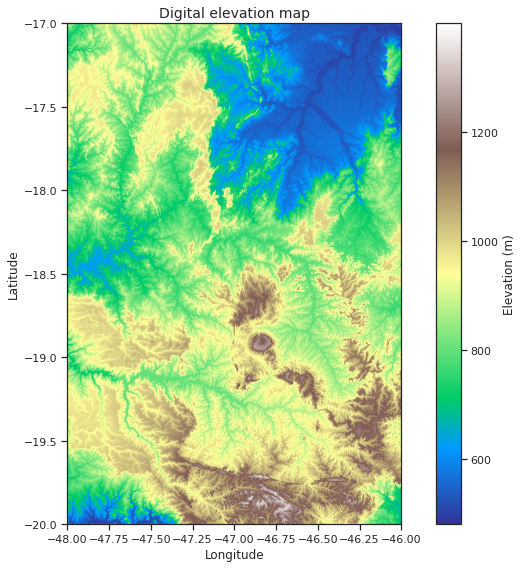

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
fig.patch.set_alpha(0)

plt.imshow(dem, extent=grid.extent, cmap='terrain', zorder=1)
plt.colorbar(label='Elevation (m)')
plt.grid(zorder=0)
plt.title('Digital elevation map', size=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()